# Prototype 1, 2, 3 and Non-Federated Training for MNIST

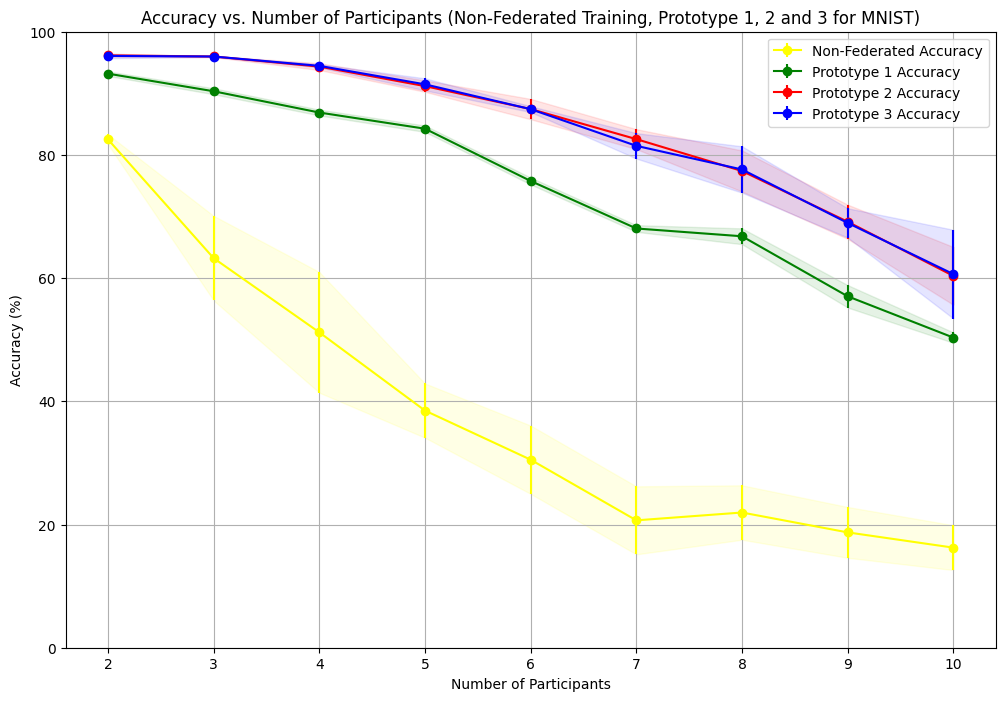

   Participants       Mean        CI
0             2  82.526000  0.809708
1             3  63.244667  6.869093
2             4  51.199500  9.792884
3             5  38.498000  4.400052
4             6  30.523333  5.545953
5             7  20.678857  5.519192
6             8  21.949250  4.415090
7             9  18.723111  4.121776
8            10  16.246400  3.636243
   Participants    Mean        CI
0             2  93.194  0.366722
1             3  90.336  0.482942
2             4  86.882  0.468093
3             5  84.256  0.518727
4             6  75.768  0.557395
5             7  68.058  0.540830
6             8  66.794  1.283144
7             9  57.046  1.819845
8            10  50.344  0.844815
   Participants    Mean        CI
0             2  96.156  0.241822
1             3  95.978  0.103290
2             4  94.338  0.551067
3             5  91.172  0.921738
4             6  87.444  1.649606
5             7  82.562  1.618703
6             8  77.388  3.332838
7             9  6

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem, t

# First, Non-Federated Training log data

log_data = """
ubuntu@sabyasachi-ma:~$ python3 No_Gradient_Exchange.py


Seed 1:

Training with 2 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 84.00%
Participant Model Accuracy: 81.58%
Standard Deviation of Accuracies: 1.21

Training with 3 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 51.51%
Participant Model Accuracy: 81.15%
Participant Model Accuracy: 57.74%
Standard Deviation of Accuracies: 12.76

Training with 4 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 28.31%
Participant Model Accuracy: 71.87%
Participant Model Accuracy: 69.53%
Participant Model Accuracy: 36.15%
Standard Deviation of Accuracies: 19.45

Training with 5 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 26.62%
Participant Model Accuracy: 41.32%
Participant Model Accuracy: 52.55%
Participant Model Accuracy: 44.92%
Participant Model Accuracy: 27.48%
Standard Deviation of Accuracies: 10.09

Training with 6 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 13.56%
Participant Model Accuracy: 38.99%
Participant Model Accuracy: 10.79%
Participant Model Accuracy: 51.57%
Participant Model Accuracy: 34.63%
Participant Model Accuracy: 31.10%
Standard Deviation of Accuracies: 14.19

Training with 7 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 9.40%
Participant Model Accuracy: 6.58%
Participant Model Accuracy: 45.61%
Participant Model Accuracy: 3.78%
Participant Model Accuracy: 46.19%
Participant Model Accuracy: 13.04%
Participant Model Accuracy: 12.29%
Standard Deviation of Accuracies: 16.92

Training with 8 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 11.38%
Participant Model Accuracy: 12.84%
Participant Model Accuracy: 28.48%
Participant Model Accuracy: 49.72%
Participant Model Accuracy: 15.44%
Participant Model Accuracy: 12.66%
Participant Model Accuracy: 35.16%
Participant Model Accuracy: 11.16%
Standard Deviation of Accuracies: 13.36

Training with 9 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Training Participant 9 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 12.19%
Participant Model Accuracy: 7.23%
Participant Model Accuracy: 14.24%
Participant Model Accuracy: 29.37%
Participant Model Accuracy: 52.92%
Participant Model Accuracy: 11.05%
Participant Model Accuracy: 15.49%
Participant Model Accuracy: 9.16%
Participant Model Accuracy: 16.67%
Standard Deviation of Accuracies: 13.51

Training with 10 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Training Participant 9 without federation
Training Participant 10 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 9.68%
Participant Model Accuracy: 13.84%
Participant Model Accuracy: 13.78%
Participant Model Accuracy: 10.54%
Participant Model Accuracy: 3.71%
Participant Model Accuracy: 52.16%
Participant Model Accuracy: 22.36%
Participant Model Accuracy: 9.08%
Participant Model Accuracy: 9.06%
Participant Model Accuracy: 16.06%
Standard Deviation of Accuracies: 12.94


Seed 2:

Training with 2 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 83.98%
Participant Model Accuracy: 81.12%
Standard Deviation of Accuracies: 1.43

Training with 3 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 51.90%
Participant Model Accuracy: 77.25%
Participant Model Accuracy: 58.75%
Standard Deviation of Accuracies: 10.71

Training with 4 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 25.40%
Participant Model Accuracy: 72.34%
Participant Model Accuracy: 69.70%
Participant Model Accuracy: 34.29%
Standard Deviation of Accuracies: 20.85

Training with 5 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 28.06%
Participant Model Accuracy: 39.21%
Participant Model Accuracy: 53.98%
Participant Model Accuracy: 44.61%
Participant Model Accuracy: 25.38%
Standard Deviation of Accuracies: 10.57

Training with 6 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 13.93%
Participant Model Accuracy: 39.12%
Participant Model Accuracy: 12.49%
Participant Model Accuracy: 51.85%
Participant Model Accuracy: 35.60%
Participant Model Accuracy: 35.44%
Standard Deviation of Accuracies: 13.99

Training with 7 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 10.46%
Participant Model Accuracy: 9.30%
Participant Model Accuracy: 44.07%
Participant Model Accuracy: 12.00%
Participant Model Accuracy: 45.81%
Participant Model Accuracy: 13.92%
Participant Model Accuracy: 10.20%
Standard Deviation of Accuracies: 15.32

Training with 8 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 12.10%
Participant Model Accuracy: 11.50%
Participant Model Accuracy: 33.45%
Participant Model Accuracy: 48.80%
Participant Model Accuracy: 12.61%
Participant Model Accuracy: 10.27%
Participant Model Accuracy: 35.49%
Participant Model Accuracy: 11.07%
Standard Deviation of Accuracies: 14.07

Training with 9 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Training Participant 9 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 11.50%
Participant Model Accuracy: 13.92%
Participant Model Accuracy: 14.99%
Participant Model Accuracy: 27.25%
Participant Model Accuracy: 54.32%
Participant Model Accuracy: 9.98%
Participant Model Accuracy: 10.10%
Participant Model Accuracy: 12.33%
Participant Model Accuracy: 16.59%
Standard Deviation of Accuracies: 13.44

Training with 10 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Training Participant 9 without federation
Training Participant 10 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 10.87%
Participant Model Accuracy: 12.50%
Participant Model Accuracy: 16.87%
Participant Model Accuracy: 11.68%
Participant Model Accuracy: 11.57%
Participant Model Accuracy: 52.38%
Participant Model Accuracy: 22.61%
Participant Model Accuracy: 5.24%
Participant Model Accuracy: 8.62%
Participant Model Accuracy: 12.07%
Standard Deviation of Accuracies: 12.76



Seed 3:

Training with 2 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 83.02%
Participant Model Accuracy: 81.89%
Standard Deviation of Accuracies: 0.56

Training with 3 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 51.53%
Participant Model Accuracy: 80.08%
Participant Model Accuracy: 59.14%
Standard Deviation of Accuracies: 12.07

Training with 4 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 26.19%
Participant Model Accuracy: 73.35%
Participant Model Accuracy: 71.53%
Participant Model Accuracy: 34.67%
Standard Deviation of Accuracies: 21.23

Training with 5 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 26.97%
Participant Model Accuracy: 41.43%
Participant Model Accuracy: 52.85%
Participant Model Accuracy: 46.39%
Participant Model Accuracy: 24.93%
Standard Deviation of Accuracies: 10.90

Training with 6 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 18.01%
Participant Model Accuracy: 37.64%
Participant Model Accuracy: 9.98%
Participant Model Accuracy: 51.62%
Participant Model Accuracy: 37.57%
Participant Model Accuracy: 35.18%
Standard Deviation of Accuracies: 13.77

Training with 7 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 8.87%
Participant Model Accuracy: 14.04%
Participant Model Accuracy: 44.63%
Participant Model Accuracy: 7.11%
Participant Model Accuracy: 46.81%
Participant Model Accuracy: 10.33%
Participant Model Accuracy: 13.99%
Standard Deviation of Accuracies: 15.93

Training with 8 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 11.80%
Participant Model Accuracy: 11.35%
Participant Model Accuracy: 29.82%
Participant Model Accuracy: 48.88%
Participant Model Accuracy: 11.79%
Participant Model Accuracy: 10.61%
Participant Model Accuracy: 34.83%
Participant Model Accuracy: 15.21%
Standard Deviation of Accuracies: 13.44

Training with 9 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Training Participant 9 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 16.60%
Participant Model Accuracy: 12.17%
Participant Model Accuracy: 7.74%
Participant Model Accuracy: 24.89%
Participant Model Accuracy: 53.74%
Participant Model Accuracy: 10.79%
Participant Model Accuracy: 11.40%
Participant Model Accuracy: 8.78%
Participant Model Accuracy: 15.57%
Standard Deviation of Accuracies: 13.55

Training with 10 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Training Participant 9 without federation
Training Participant 10 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 6.40%
Participant Model Accuracy: 14.34%
Participant Model Accuracy: 8.56%
Participant Model Accuracy: 11.82%
Participant Model Accuracy: 13.27%
Participant Model Accuracy: 52.23%
Participant Model Accuracy: 22.31%
Participant Model Accuracy: 11.44%
Participant Model Accuracy: 12.98%
Participant Model Accuracy: 14.36%
Standard Deviation of Accuracies: 12.47



Seed 4:

Training with 2 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 82.71%
Participant Model Accuracy: 81.34%
Standard Deviation of Accuracies: 0.68

Training with 3 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 52.92%
Participant Model Accuracy: 79.80%
Participant Model Accuracy: 56.68%
Standard Deviation of Accuracies: 11.88

Training with 4 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 26.35%
Participant Model Accuracy: 71.78%
Participant Model Accuracy: 70.57%
Participant Model Accuracy: 34.49%
Standard Deviation of Accuracies: 20.58

Training with 5 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 24.44%
Participant Model Accuracy: 41.24%
Participant Model Accuracy: 52.50%
Participant Model Accuracy: 44.93%
Participant Model Accuracy: 28.86%
Standard Deviation of Accuracies: 10.35

Training with 6 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 13.96%
Participant Model Accuracy: 38.88%
Participant Model Accuracy: 5.86%
Participant Model Accuracy: 52.22%
Participant Model Accuracy: 32.47%
Participant Model Accuracy: 34.45%
Standard Deviation of Accuracies: 15.48

Training with 7 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 8.54%
Participant Model Accuracy: 8.08%
Participant Model Accuracy: 45.48%
Participant Model Accuracy: 15.52%
Participant Model Accuracy: 44.86%
Participant Model Accuracy: 13.82%
Participant Model Accuracy: 15.29%
Standard Deviation of Accuracies: 15.13

Training with 8 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 14.03%
Participant Model Accuracy: 12.64%
Participant Model Accuracy: 27.87%
Participant Model Accuracy: 49.67%
Participant Model Accuracy: 6.31%
Participant Model Accuracy: 19.44%
Participant Model Accuracy: 34.52%
Participant Model Accuracy: 16.07%
Standard Deviation of Accuracies: 13.20

Training with 9 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Training Participant 9 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 15.65%
Participant Model Accuracy: 10.60%
Participant Model Accuracy: 16.56%
Participant Model Accuracy: 29.41%
Participant Model Accuracy: 53.97%
Participant Model Accuracy: 5.28%
Participant Model Accuracy: 12.09%
Participant Model Accuracy: 11.30%
Participant Model Accuracy: 17.97%
Standard Deviation of Accuracies: 13.80

Training with 10 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Training Participant 9 without federation
Training Participant 10 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 12.63%
Participant Model Accuracy: 10.28%
Participant Model Accuracy: 12.23%
Participant Model Accuracy: 3.96%
Participant Model Accuracy: 11.53%
Participant Model Accuracy: 51.92%
Participant Model Accuracy: 20.83%
Participant Model Accuracy: 9.46%
Participant Model Accuracy: 11.51%
Participant Model Accuracy: 10.04%
Standard Deviation of Accuracies: 12.78


Seed 5:

Training with 2 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 83.84%
Participant Model Accuracy: 81.78%
Standard Deviation of Accuracies: 1.03

Training with 3 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 52.19%
Participant Model Accuracy: 80.64%
Participant Model Accuracy: 57.39%
Standard Deviation of Accuracies: 12.37

Training with 4 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 28.45%
Participant Model Accuracy: 72.38%
Participant Model Accuracy: 70.51%
Participant Model Accuracy: 36.13%
Standard Deviation of Accuracies: 19.78

Training with 5 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 28.40%
Participant Model Accuracy: 40.53%
Participant Model Accuracy: 53.12%
Participant Model Accuracy: 45.77%
Participant Model Accuracy: 25.96%
Standard Deviation of Accuracies: 10.29

Training with 6 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 10.36%
Participant Model Accuracy: 40.40%
Participant Model Accuracy: 9.64%
Participant Model Accuracy: 52.13%
Participant Model Accuracy: 32.81%
Participant Model Accuracy: 33.45%
Standard Deviation of Accuracies: 15.37

Training with 7 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 13.40%
Participant Model Accuracy: 7.34%
Participant Model Accuracy: 44.41%
Participant Model Accuracy: 11.83%
Participant Model Accuracy: 46.14%
Participant Model Accuracy: 10.88%
Participant Model Accuracy: 9.74%
Standard Deviation of Accuracies: 15.75

Training with 8 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 8.98%
Participant Model Accuracy: 14.34%
Participant Model Accuracy: 29.56%
Participant Model Accuracy: 49.38%
Participant Model Accuracy: 15.40%
Participant Model Accuracy: 5.18%
Participant Model Accuracy: 34.28%
Participant Model Accuracy: 13.88%
Standard Deviation of Accuracies: 14.03

Training with 9 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Training Participant 9 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 11.49%
Participant Model Accuracy: 8.48%
Participant Model Accuracy: 9.95%
Participant Model Accuracy: 28.32%
Participant Model Accuracy: 53.31%
Participant Model Accuracy: 16.34%
Participant Model Accuracy: 11.05%
Participant Model Accuracy: 11.52%
Participant Model Accuracy: 18.27%
Standard Deviation of Accuracies: 13.50

Training with 10 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Training Participant 9 without federation
Training Participant 10 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 11.79%
Participant Model Accuracy: 13.22%
Participant Model Accuracy: 11.05%
Participant Model Accuracy: 7.96%
Participant Model Accuracy: 9.52%
Participant Model Accuracy: 51.79%
Participant Model Accuracy: 21.90%
Participant Model Accuracy: 10.47%
Participant Model Accuracy: 16.44%
Participant Model Accuracy: 11.40%
Standard Deviation of Accuracies: 12.33
ubuntu@sabyasachi-ma:~$ tmux capture-pane -S -1000


"""

# Finding accuracies using re
pattern = re.compile(r'Training with (\d+) participants.*?Evaluating individual models from non-federated training:(.*?)Standard Deviation of Accuracies: ([\d\.]+)', re.DOTALL)
matches = pattern.findall(log_data)

results = []

for match in matches:
    num_participants = int(match[0])
    accuracies = re.findall(r'Participant Model Accuracy: ([\d\.]+)%', match[1])
    accuracies = list(map(float, accuracies))
    results.append((num_participants, accuracies))

# DataFrame created for easier processing
data = []
for num_participants, accuracies in results:
    for acc in accuracies:
        data.append((num_participants, acc))

df = pd.DataFrame(data, columns=['Participants', 'Accuracy'])

# Mean and 95% CI
def mean_and_ci(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    se = sem(data)
    h = se * t.ppf((1 + confidence) / 2., n-1)
    return mean, h

summary = df.groupby('Participants')['Accuracy'].apply(list).apply(lambda x: mean_and_ci(x)).apply(pd.Series)
summary.columns = ['Mean', 'CI']
summary.reset_index(inplace=True)



# Prototype 1 data
proto1_data = """
Seed: 0, Number of Participants: 2, Accuracy: 93.14%
Seed: 0, Number of Participants: 3, Accuracy: 90.22%
Seed: 0, Number of Participants: 4, Accuracy: 86.43%
Seed: 0, Number of Participants: 5, Accuracy: 84.31%
Seed: 0, Number of Participants: 6, Accuracy: 76.15%
Seed: 0, Number of Participants: 7, Accuracy: 68.83%
Seed: 0, Number of Participants: 8, Accuracy: 65.19%
Seed: 0, Number of Participants: 9, Accuracy: 57.38%
Seed: 0, Number of Participants: 10, Accuracy: 50.00%
Seed: 1, Number of Participants: 2, Accuracy: 93.62%
Seed: 1, Number of Participants: 3, Accuracy: 89.92%
Seed: 1, Number of Participants: 4, Accuracy: 87.28%
Seed: 1, Number of Participants: 5, Accuracy: 84.61%
Seed: 1, Number of Participants: 6, Accuracy: 75.03%
Seed: 1, Number of Participants: 7, Accuracy: 67.84%
Seed: 1, Number of Participants: 8, Accuracy: 67.27%
Seed: 1, Number of Participants: 9, Accuracy: 59.25%
Seed: 1, Number of Participants: 10, Accuracy: 49.78%
Seed: 2, Number of Participants: 2, Accuracy: 93.23%
Seed: 2, Number of Participants: 3, Accuracy: 90.14%
Seed: 2, Number of Participants: 4, Accuracy: 87.22%
Seed: 2, Number of Participants: 5, Accuracy: 83.54%
Seed: 2, Number of Participants: 6, Accuracy: 75.86%
Seed: 2, Number of Participants: 7, Accuracy: 67.96%
Seed: 2, Number of Participants: 8, Accuracy: 67.78%
Seed: 2, Number of Participants: 9, Accuracy: 56.64%
Seed: 2, Number of Participants: 10, Accuracy: 49.90%
Seed: 3, Number of Participants: 2, Accuracy: 92.79%
Seed: 3, Number of Participants: 3, Accuracy: 90.46%
Seed: 3, Number of Participants: 4, Accuracy: 86.58%
Seed: 3, Number of Participants: 5, Accuracy: 84.48%
Seed: 3, Number of Participants: 6, Accuracy: 76.09%
Seed: 3, Number of Participants: 7, Accuracy: 67.80%
Seed: 3, Number of Participants: 8, Accuracy: 67.36%
Seed: 3, Number of Participants: 9, Accuracy: 55.21%
Seed: 3, Number of Participants: 10, Accuracy: 50.63%
Seed: 4, Number of Participants: 2, Accuracy: 93.19%
Seed: 4, Number of Participants: 3, Accuracy: 90.94%
Seed: 4, Number of Participants: 4, Accuracy: 86.90%
Seed: 4, Number of Participants: 5, Accuracy: 84.34%
Seed: 4, Number of Participants: 6, Accuracy: 75.71%
Seed: 4, Number of Participants: 7, Accuracy: 67.86%
Seed: 4, Number of Participants: 8, Accuracy: 66.37%
Seed: 4, Number of Participants: 9, Accuracy: 56.75%
Seed: 4, Number of Participants: 10, Accuracy: 51.41%
"""


pattern = re.compile(r'Seed: \d+, Number of Participants: (\d+), Accuracy: ([\d\.]+)%')
matches = pattern.findall(proto1_data)

proto1_results = []
for match in matches:
    num_participants = int(match[0])
    accuracy = float(match[1])
    proto1_results.append((num_participants, accuracy))


proto1_df = pd.DataFrame(proto1_results, columns=['Participants', 'Accuracy'])

# Mean and 95% CI for Prototype 1
proto1_summary = proto1_df.groupby('Participants')['Accuracy'].apply(list).apply(lambda x: mean_and_ci(x)).apply(pd.Series)
proto1_summary.columns = ['Mean', 'CI']
proto1_summary.reset_index(inplace=True)


# Prototype 2 data
proto2_data = """
Seed: 0, Number of Participants: 2, Accuracy: 96.20%
Seed: 0, Number of Participants: 3, Accuracy: 95.91%
Seed: 0, Number of Participants: 4, Accuracy: 94.33%
Seed: 0, Number of Participants: 5, Accuracy: 89.94%
Seed: 0, Number of Participants: 6, Accuracy: 88.34%
Seed: 0, Number of Participants: 7, Accuracy: 82.24%
Seed: 0, Number of Participants: 8, Accuracy: 78.96%
Seed: 0, Number of Participants: 9, Accuracy: 69.13%
Seed: 0, Number of Participants: 10, Accuracy: 61.43%
Seed: 1, Number of Participants: 2, Accuracy: 95.85%
Seed: 1, Number of Participants: 3, Accuracy: 95.93%
Seed: 1, Number of Participants: 4, Accuracy: 94.02%
Seed: 1, Number of Participants: 5, Accuracy: 91.85%
Seed: 1, Number of Participants: 6, Accuracy: 85.63%
Seed: 1, Number of Participants: 7, Accuracy: 82.35%
Seed: 1, Number of Participants: 8, Accuracy: 77.73%
 Seed: 1, Number of Participants: 9, Accuracy: 71.94%
Seed: 1, Number of Participants: 10, Accuracy: 58.25%
Seed: 2, Number of Participants: 2, Accuracy: 96.35%
Seed: 2, Number of Participants: 3, Accuracy: 96.11%
Seed: 2, Number of Participants: 4, Accuracy: 94.32%
Seed: 2, Number of Participants: 5, Accuracy: 91.64%
Seed: 2, Number of Participants: 6, Accuracy: 88.60%
Seed: 2, Number of Participants: 7, Accuracy: 83.60%
Seed: 2, Number of Participants: 8, Accuracy: 79.07%
Seed: 2, Number of Participants: 9, Accuracy: 66.58%
Seed: 2, Number of Participants: 10, Accuracy: 59.10%
Seed: 3, Number of Participants: 2, Accuracy: 96.10%
Seed: 3, Number of Participants: 3, Accuracy: 95.93%
Seed: 3, Number of Participants: 4, Accuracy: 93.95%
Seed: 3, Number of Participants: 5, Accuracy: 91.26%
Seed: 3, Number of Participants: 6, Accuracy: 86.43%
Seed: 3, Number of Participants: 7, Accuracy: 83.96%
Seed: 3, Number of Participants: 8, Accuracy: 72.68%
Seed: 3, Number of Participants: 9, Accuracy: 70.71%
Seed: 3, Number of Participants: 10, Accuracy: 66.38%
Seed: 4, Number of Participants: 2, Accuracy: 96.28%
Seed: 4, Number of Participants: 3, Accuracy: 96.01%
Seed: 4, Number of Participants: 4, Accuracy: 95.07%
Seed: 4, Number of Participants: 5, Accuracy: 91.17%
Seed: 4, Number of Participants: 6, Accuracy: 88.22%
Seed: 4, Number of Participants: 7, Accuracy: 80.66%
Seed: 4, Number of Participants: 8, Accuracy: 78.50%
Seed: 4, Number of Participants: 9, Accuracy: 67.38%
Seed: 4, Number of Participants: 10, Accuracy: 56.66%
"""


pattern = re.compile(r'Seed: \d+, Number of Participants: (\d+), Accuracy: ([\d\.]+)%')
matches = pattern.findall(proto2_data)

proto2_results = []
for match in matches:
    num_participants = int(match[0])
    accuracy = float(match[1])
    proto2_results.append((num_participants, accuracy))


proto2_df = pd.DataFrame(proto2_results, columns=['Participants', 'Accuracy'])

# Mean and 95% CI for Prototype 2
proto2_summary = proto2_df.groupby('Participants')['Accuracy'].apply(list).apply(lambda x: mean_and_ci(x)).apply(pd.Series)
proto2_summary.columns = ['Mean', 'CI']
proto2_summary.reset_index(inplace=True)





# Prototype 3 data
proto3_data = """
Seed: 0, Number of Participants: 2, Accuracy: 96.43%
Seed: 0, Number of Participants: 3, Accuracy: 95.94%
Seed: 0, Number of Participants: 4, Accuracy: 94.11%
Seed: 0, Number of Participants: 5, Accuracy: 90.39%
Seed: 0, Number of Participants: 6, Accuracy: 87.58%
Seed: 0, Number of Participants: 7, Accuracy: 82.16%
Seed: 0, Number of Participants: 8, Accuracy: 79.32%
Seed: 0, Number of Participants: 9, Accuracy: 69.67%
Seed: 0, Number of Participants: 10, Accuracy: 59.94%
Seed: 1, Number of Participants: 2, Accuracy: 95.70%
Seed: 1, Number of Participants: 3, Accuracy: 96.02%
Seed: 1, Number of Participants: 4, Accuracy: 94.54%
Seed: 1, Number of Participants: 5, Accuracy: 90.91%
Seed: 1, Number of Participants: 6, Accuracy: 87.00%
Seed: 1, Number of Participants: 7, Accuracy: 82.19%
Seed: 1, Number of Participants: 8, Accuracy: 75.62%
Seed: 1, Number of Participants: 9, Accuracy: 71.59%
Seed: 1, Number of Participants: 10, Accuracy: 57.15%
Seed: 2, Number of Participants: 2, Accuracy: 96.14%
Seed: 2, Number of Participants: 3, Accuracy: 95.93%
Seed: 2, Number of Participants: 4, Accuracy: 94.50%
Seed: 2, Number of Participants: 5, Accuracy: 92.05%
Seed: 2, Number of Participants: 6, Accuracy: 87.79%
Seed: 2, Number of Participants: 7, Accuracy: 80.10%
Seed: 2, Number of Participants: 8, Accuracy: 79.53%
Seed: 2, Number of Participants: 9, Accuracy: 69.34%
Seed: 2, Number of Participants: 10, Accuracy: 65.95%
Seed: 3, Number of Participants: 2, Accuracy: 95.84%
Seed: 3, Number of Participants: 3, Accuracy: 96.05%
Seed: 3, Number of Participants: 4, Accuracy: 94.47%
Seed: 3, Number of Participants: 5, Accuracy: 91.68%
Seed: 3, Number of Participants: 6, Accuracy: 87.74%
Seed: 3, Number of Participants: 7, Accuracy: 83.48%
Seed: 3, Number of Participants: 8, Accuracy: 80.39%
Seed: 3, Number of Participants: 9, Accuracy: 66.79%
Seed: 3, Number of Participants: 10, Accuracy: 66.93%
Seed: 4, Number of Participants: 2, Accuracy: 96.25%
Seed: 4, Number of Participants: 3, Accuracy: 95.94%
Seed: 4, Number of Participants: 4, Accuracy: 94.68%
Seed: 4, Number of Participants: 5, Accuracy: 92.26%
Seed: 4, Number of Participants: 6, Accuracy: 87.04%
Seed: 4, Number of Participants: 7, Accuracy: 79.44%
Seed: 4, Number of Participants: 8, Accuracy: 73.32%
Seed: 4, Number of Participants: 9, Accuracy: 67.40%
Seed: 4, Number of Participants: 10, Accuracy: 53.27%
"""


pattern = re.compile(r'Seed: \d+, Number of Participants: (\d+), Accuracy: ([\d\.]+)%')
matches = pattern.findall(proto3_data)

proto3_results = []
for match in matches:
    num_participants = int(match[0])
    accuracy = float(match[1])
    proto3_results.append((num_participants, accuracy))


proto3_df = pd.DataFrame(proto3_results, columns=['Participants', 'Accuracy'])

# Mean and 95% CI for Prototype 2
proto3_summary = proto3_df.groupby('Participants')['Accuracy'].apply(list).apply(lambda x: mean_and_ci(x)).apply(pd.Series)
proto3_summary.columns = ['Mean', 'CI']
proto3_summary.reset_index(inplace=True)


# Final ResultPlot
plt.figure(figsize=(12, 8))

# Non-Federated Training Results
plt.errorbar(summary['Participants'], summary['Mean'], yerr=summary['CI'], fmt='-o', label='Non-Federated Accuracy', color='yellow')
plt.fill_between(summary['Participants'], summary['Mean'] - summary['CI'], summary['Mean'] + summary['CI'], color='yellow', alpha=0.1)

# Prototype 1 Results
plt.errorbar(proto1_summary['Participants'], proto1_summary['Mean'], yerr=proto1_summary['CI'], fmt='-o', label='Prototype 1 Accuracy', color='green')
plt.fill_between(proto1_summary['Participants'], proto1_summary['Mean'] - proto1_summary['CI'], proto1_summary['Mean'] + proto1_summary['CI'], color='green', alpha=0.1)

# Prototype 2 Results
plt.errorbar(proto2_summary['Participants'], proto2_summary['Mean'], yerr=proto2_summary['CI'], fmt='-o', label='Prototype 2 Accuracy', color='red')
plt.fill_between(proto2_summary['Participants'], proto2_summary['Mean'] - proto2_summary['CI'], proto2_summary['Mean'] + proto2_summary['CI'], color='red', alpha=0.1)

# Prototype 3 Results
plt.errorbar(proto3_summary['Participants'], proto3_summary['Mean'], yerr=proto3_summary['CI'], fmt='-o', label='Prototype 3 Accuracy', color='blue')
plt.fill_between(proto3_summary['Participants'], proto3_summary['Mean'] - proto3_summary['CI'], proto3_summary['Mean'] + proto3_summary['CI'], color='blue', alpha=0.1)


plt.xlabel('Number of Participants')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Number of Participants (Non-Federated Training, Prototype 1, 2 and 3 for MNIST)')
plt.ylim([0, 100])
plt.legend()
plt.grid(True)
plt.show()


print(summary)
print(proto1_summary)
print(proto2_summary)
print(proto3_summary)


# Prototype 1, 2, 3 and Non-Federated Training for Fashion MNIST

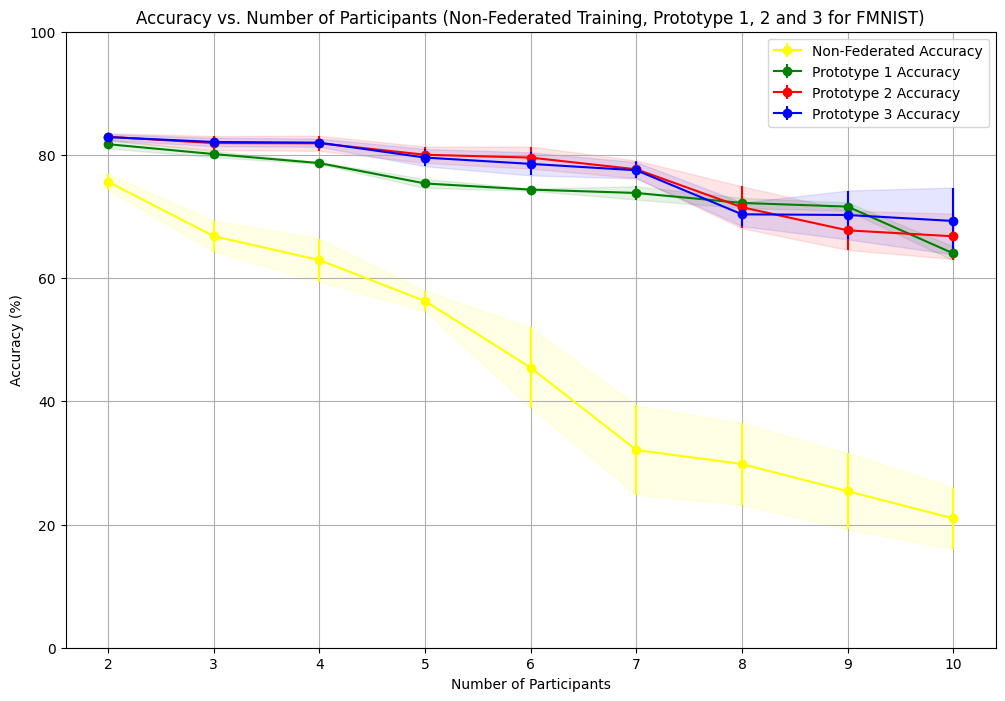

   Participants       Mean        CI
0             2  75.645000  1.271070
1             3  66.816667  2.532051
2             4  62.934500  3.484843
3             5  56.288400  1.662066
4             6  45.460333  6.538960
5             7  32.094000  7.247965
6             8  29.820250  6.648323
7             9  25.405111  6.166431
8            10  20.988800  4.980034
   Participants    Mean        CI
0             2  81.740  0.679974
1             3  80.142  0.498942
2             4  78.676  0.163457
3             5  75.368  0.734757
4             6  74.372  0.183833
5             7  73.824  1.082158
6             8  72.206  0.825991
7             9  71.610  0.674910
8            10  64.006  1.123366
   Participants    Mean        CI
0             2  82.942  0.577567
1             3  81.922  1.148066
2             4  81.886  1.225938
3             5  80.028  1.326937
4             6  79.564  1.795044
5             7  77.666  1.423388
6             8  71.502  3.406545
7             9  6

In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem, t

# Non-Federated Training log data now for FMNIST
log_data = """

ubuntu@sabyasachi-ma:~$ python3 No_Gradient_ExchangeFMNIST.py

Training with 2 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 77.74%
Participant Model Accuracy: 74.42%
Standard Deviation of Accuracies: 1.66

Training with 3 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 64.01%
Participant Model Accuracy: 72.87%
Participant Model Accuracy: 63.17%
Standard Deviation of Accuracies: 4.39

Training with 4 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 51.70%
Participant Model Accuracy: 71.31%
Participant Model Accuracy: 67.32%
Participant Model Accuracy: 59.41%
Standard Deviation of Accuracies: 7.53

Training with 5 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 51.81%
Participant Model Accuracy: 54.30%
Participant Model Accuracy: 62.76%
Participant Model Accuracy: 57.70%
Participant Model Accuracy: 52.62%
Standard Deviation of Accuracies: 4.01

Training with 6 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 33.60%
Participant Model Accuracy: 56.90%
Participant Model Accuracy: 8.75%
Participant Model Accuracy: 61.85%
Participant Model Accuracy: 55.97%
Participant Model Accuracy: 53.56%
Standard Deviation of Accuracies: 18.54

Training with 7 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 30.78%
Participant Model Accuracy: 11.14%
Participant Model Accuracy: 59.79%
Participant Model Accuracy: 9.98%
Participant Model Accuracy: 58.31%
Participant Model Accuracy: 12.66%
Participant Model Accuracy: 43.45%
Standard Deviation of Accuracies: 20.32

Training with 8 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 34.97%
Participant Model Accuracy: 15.10%
Participant Model Accuracy: 42.38%
Participant Model Accuracy: 60.56%
Participant Model Accuracy: 9.08%
Participant Model Accuracy: 7.75%
Participant Model Accuracy: 56.25%
Participant Model Accuracy: 12.82%
Standard Deviation of Accuracies: 20.16

Training with 9 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Training Participant 9 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 34.71%
Participant Model Accuracy: 10.00%
Participant Model Accuracy: 9.96%
Participant Model Accuracy: 40.09%
Participant Model Accuracy: 63.78%
Participant Model Accuracy: 10.27%
Participant Model Accuracy: 6.12%
Participant Model Accuracy: 5.31%
Participant Model Accuracy: 46.24%
Standard Deviation of Accuracies: 20.25

Training with 10 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Training Participant 9 without federation
Training Participant 10 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 34.66%
Participant Model Accuracy: 12.96%
Participant Model Accuracy: 9.68%
Participant Model Accuracy: 6.21%
Participant Model Accuracy: 9.45%
Participant Model Accuracy: 61.26%
Participant Model Accuracy: 39.51%
Participant Model Accuracy: 11.07%
Participant Model Accuracy: 8.38%
Participant Model Accuracy: 10.81%
Standard Deviation of Accuracies: 17.47

Training with 2 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 76.69%
Participant Model Accuracy: 73.46%
Standard Deviation of Accuracies: 1.62

Training with 3 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 65.10%
Participant Model Accuracy: 73.24%
Participant Model Accuracy: 60.70%
Standard Deviation of Accuracies: 5.19

Training with 4 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 52.93%
Participant Model Accuracy: 72.47%
Participant Model Accuracy: 67.47%
Participant Model Accuracy: 59.33%
Standard Deviation of Accuracies: 7.49

Training with 5 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 54.12%
Participant Model Accuracy: 56.62%
Participant Model Accuracy: 63.44%
Participant Model Accuracy: 57.42%
Participant Model Accuracy: 50.52%
Standard Deviation of Accuracies: 4.25

Training with 6 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 35.60%
Participant Model Accuracy: 56.54%
Participant Model Accuracy: 9.22%
Participant Model Accuracy: 61.65%
Participant Model Accuracy: 55.77%
Participant Model Accuracy: 53.02%
Standard Deviation of Accuracies: 18.07

Training with 7 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 34.57%
Participant Model Accuracy: 7.25%
Participant Model Accuracy: 59.72%
Participant Model Accuracy: 11.84%
Participant Model Accuracy: 57.88%
Participant Model Accuracy: 9.97%
Participant Model Accuracy: 41.38%
Standard Deviation of Accuracies: 20.83

Training with 8 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 34.85%
Participant Model Accuracy: 3.58%
Participant Model Accuracy: 44.80%
Participant Model Accuracy: 60.29%
Participant Model Accuracy: 14.10%
Participant Model Accuracy: 9.75%
Participant Model Accuracy: 56.04%
Participant Model Accuracy: 10.02%
Standard Deviation of Accuracies: 21.19

Training with 9 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Training Participant 9 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 32.36%
Participant Model Accuracy: 8.76%
Participant Model Accuracy: 8.01%
Participant Model Accuracy: 43.13%
Participant Model Accuracy: 63.26%
Participant Model Accuracy: 8.77%
Participant Model Accuracy: 5.26%
Participant Model Accuracy: 8.98%
Participant Model Accuracy: 46.77%
Standard Deviation of Accuracies: 20.50

Training with 10 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Training Participant 9 without federation
Training Participant 10 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 33.86%
Participant Model Accuracy: 7.41%
Participant Model Accuracy: 15.94%
Participant Model Accuracy: 21.34%
Participant Model Accuracy: 11.21%
Participant Model Accuracy: 61.08%
Participant Model Accuracy: 40.26%
Participant Model Accuracy: 1.00%
Participant Model Accuracy: 12.31%
Participant Model Accuracy: 11.85%
Standard Deviation of Accuracies: 17.33

Training with 2 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 77.03%
Participant Model Accuracy: 74.43%
Standard Deviation of Accuracies: 1.30

Training with 3 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 62.48%
Participant Model Accuracy: 72.60%
Participant Model Accuracy: 64.09%
Standard Deviation of Accuracies: 4.44

Training with 4 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 52.01%
Participant Model Accuracy: 71.74%
Participant Model Accuracy: 67.64%
Participant Model Accuracy: 58.79%
Standard Deviation of Accuracies: 7.67

Training with 5 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 54.62%
Participant Model Accuracy: 53.94%
Participant Model Accuracy: 61.27%
Participant Model Accuracy: 57.64%
Participant Model Accuracy: 53.58%
Standard Deviation of Accuracies: 2.91

Training with 6 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 36.52%
Participant Model Accuracy: 55.06%
Participant Model Accuracy: 16.57%
Participant Model Accuracy: 60.89%
Participant Model Accuracy: 56.00%
Participant Model Accuracy: 53.63%
Standard Deviation of Accuracies: 15.37

Training with 7 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 36.18%
Participant Model Accuracy: 10.49%
Participant Model Accuracy: 60.15%
Participant Model Accuracy: 9.88%
Participant Model Accuracy: 57.37%
Participant Model Accuracy: 5.50%
Participant Model Accuracy: 42.60%
Standard Deviation of Accuracies: 21.45

Training with 8 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 37.90%
Participant Model Accuracy: 9.33%
Participant Model Accuracy: 42.04%
Participant Model Accuracy: 60.86%
Participant Model Accuracy: 14.38%
Participant Model Accuracy: 12.53%
Participant Model Accuracy: 55.87%
Participant Model Accuracy: 12.28%
Standard Deviation of Accuracies: 19.74

Training with 9 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Training Participant 9 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 34.47%
Participant Model Accuracy: 12.98%
Participant Model Accuracy: 7.63%
Participant Model Accuracy: 40.14%
Participant Model Accuracy: 63.85%
Participant Model Accuracy: 19.18%
Participant Model Accuracy: 11.66%
Participant Model Accuracy: 1.92%
Participant Model Accuracy: 47.78%
Standard Deviation of Accuracies: 19.76

Training with 10 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Training Participant 9 without federation
Training Participant 10 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 34.47%
Participant Model Accuracy: 11.54%
Participant Model Accuracy: 8.42%
Participant Model Accuracy: 8.94%
Participant Model Accuracy: 5.41%
Participant Model Accuracy: 61.68%
Participant Model Accuracy: 39.15%
Participant Model Accuracy: 10.65%
Participant Model Accuracy: 16.18%
Participant Model Accuracy: 9.58%
Standard Deviation of Accuracies: 17.50

Training with 2 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 77.57%
Participant Model Accuracy: 73.54%
Standard Deviation of Accuracies: 2.01

Training with 3 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 65.27%
Participant Model Accuracy: 73.02%
Participant Model Accuracy: 64.17%
Standard Deviation of Accuracies: 3.94

Training with 4 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 55.24%
Participant Model Accuracy: 72.07%
Participant Model Accuracy: 67.39%
Participant Model Accuracy: 59.01%
Standard Deviation of Accuracies: 6.65

Training with 5 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 52.23%
Participant Model Accuracy: 57.16%
Participant Model Accuracy: 63.06%
Participant Model Accuracy: 57.82%
Participant Model Accuracy: 52.41%
Standard Deviation of Accuracies: 4.00

Training with 6 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 35.07%
Participant Model Accuracy: 56.79%
Participant Model Accuracy: 9.78%
Participant Model Accuracy: 60.83%
Participant Model Accuracy: 55.63%
Participant Model Accuracy: 49.86%
Standard Deviation of Accuracies: 17.63

Training with 7 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 34.84%
Participant Model Accuracy: 9.19%
Participant Model Accuracy: 59.52%
Participant Model Accuracy: 10.36%
Participant Model Accuracy: 56.99%
Participant Model Accuracy: 10.79%
Participant Model Accuracy: 41.00%
Standard Deviation of Accuracies: 20.39

Training with 8 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 35.00%
Participant Model Accuracy: 8.52%
Participant Model Accuracy: 45.24%
Participant Model Accuracy: 60.18%
Participant Model Accuracy: 9.88%
Participant Model Accuracy: 10.03%
Participant Model Accuracy: 55.68%
Participant Model Accuracy: 10.16%
Standard Deviation of Accuracies: 20.86

Training with 9 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Training Participant 9 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 34.62%
Participant Model Accuracy: 2.38%
Participant Model Accuracy: 3.69%
Participant Model Accuracy: 42.37%
Participant Model Accuracy: 63.53%
Participant Model Accuracy: 13.45%
Participant Model Accuracy: 9.84%
Participant Model Accuracy: 11.03%
Participant Model Accuracy: 46.09%
Standard Deviation of Accuracies: 20.68

Training with 10 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Training Participant 9 without federation
Training Participant 10 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 34.52%
Participant Model Accuracy: 12.20%
Participant Model Accuracy: 15.06%
Participant Model Accuracy: 11.81%
Participant Model Accuracy: 10.10%
Participant Model Accuracy: 61.78%
Participant Model Accuracy: 37.78%
Participant Model Accuracy: 13.80%
Participant Model Accuracy: 9.71%
Participant Model Accuracy: 9.75%
Standard Deviation of Accuracies: 16.57

Training with 2 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 77.38%
Participant Model Accuracy: 74.19%
Standard Deviation of Accuracies: 1.59

Training with 3 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 65.39%
Participant Model Accuracy: 72.57%
Participant Model Accuracy: 63.57%
Standard Deviation of Accuracies: 3.89

Training with 4 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 54.55%
Participant Model Accuracy: 71.92%
Participant Model Accuracy: 67.41%
Participant Model Accuracy: 58.98%
Standard Deviation of Accuracies: 6.83

Training with 5 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 55.41%
Participant Model Accuracy: 55.46%
Participant Model Accuracy: 63.65%
Participant Model Accuracy: 57.48%
Participant Model Accuracy: 50.17%
Standard Deviation of Accuracies: 4.35

Training with 6 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 35.53%
Participant Model Accuracy: 57.10%
Participant Model Accuracy: 14.59%
Participant Model Accuracy: 61.41%
Participant Model Accuracy: 56.40%
Participant Model Accuracy: 49.72%
Standard Deviation of Accuracies: 16.22

Training with 7 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 33.07%
Participant Model Accuracy: 17.27%
Participant Model Accuracy: 59.63%
Participant Model Accuracy: 5.71%
Participant Model Accuracy: 58.02%
Participant Model Accuracy: 9.33%
Participant Model Accuracy: 46.68%
Standard Deviation of Accuracies: 20.96

Training with 8 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 34.95%
Participant Model Accuracy: 8.55%
Participant Model Accuracy: 45.56%
Participant Model Accuracy: 61.06%
Participant Model Accuracy: 11.44%
Participant Model Accuracy: 12.30%
Participant Model Accuracy: 56.04%
Participant Model Accuracy: 10.69%
Standard Deviation of Accuracies: 20.62

Training with 9 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Training Participant 9 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 29.52%
Participant Model Accuracy: 7.49%
Participant Model Accuracy: 6.46%
Participant Model Accuracy: 42.42%
Participant Model Accuracy: 63.54%
Participant Model Accuracy: 4.10%
Participant Model Accuracy: 16.21%
Participant Model Accuracy: 8.85%
Participant Model Accuracy: 46.25%
Standard Deviation of Accuracies: 20.24

Training with 10 participants...
Training Participant 1 without federation
Training Participant 2 without federation
Training Participant 3 without federation
Training Participant 4 without federation
Training Participant 5 without federation
Training Participant 6 without federation
Training Participant 7 without federation
Training Participant 8 without federation
Training Participant 9 without federation
Training Participant 10 without federation
Evaluating individual models from non-federated training:
Participant Model Accuracy: 36.45%
Participant Model Accuracy: 13.40%
Participant Model Accuracy: 6.09%
Participant Model Accuracy: 7.94%
Participant Model Accuracy: 9.69%
Participant Model Accuracy: 61.19%
Participant Model Accuracy: 40.06%
Participant Model Accuracy: 4.94%
Participant Model Accuracy: 14.30%
Participant Model Accuracy: 12.60%
Standard Deviation of Accuracies: 17.80
ubuntu@sabyasachi-ma:~$ tmux capture-pane -S -1000



"""

# accuracy search using re
pattern = re.compile(r'Training with (\d+) participants.*?Evaluating individual models from non-federated training:(.*?)Standard Deviation of Accuracies: ([\d\.]+)', re.DOTALL)
matches = pattern.findall(log_data)

results = []

for match in matches:
    num_participants = int(match[0])
    accuracies = re.findall(r'Participant Model Accuracy: ([\d\.]+)%', match[1])
    accuracies = list(map(float, accuracies))
    results.append((num_participants, accuracies))


data = []
for num_participants, accuracies in results:
    for acc in accuracies:
        data.append((num_participants, acc))

df = pd.DataFrame(data, columns=['Participants', 'Accuracy'])

# Mean and 95% CI
def mean_and_ci(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    se = sem(data)
    h = se * t.ppf((1 + confidence) / 2., n-1)
    return mean, h

summary = df.groupby('Participants')['Accuracy'].apply(list).apply(lambda x: mean_and_ci(x)).apply(pd.Series)
summary.columns = ['Mean', 'CI']
summary.reset_index(inplace=True)

# Prototype 1 data:
proto1_data = """
Seed: 0, Number of Participants: 2, Accuracy: 81.62%
Seed: 0, Number of Participants: 3, Accuracy: 79.77%
Seed: 0, Number of Participants: 4, Accuracy: 78.51%
Seed: 0, Number of Participants: 5, Accuracy: 75.51%
Seed: 0, Number of Participants: 6, Accuracy: 74.36%
Seed: 0, Number of Participants: 7, Accuracy: 72.59%
Seed: 0, Number of Participants: 8, Accuracy: 72.35%
Seed: 0, Number of Participants: 9, Accuracy: 71.71%
Seed: 0, Number of Participants: 10, Accuracy: 63.37%
Seed: 1, Number of Participants: 2, Accuracy: 80.93%
Seed: 1, Number of Participants: 3, Accuracy: 80.03%
Seed: 1, Number of Participants: 4, Accuracy: 78.69%
Seed: 1, Number of Participants: 5, Accuracy: 75.46%
Seed: 1, Number of Participants: 6, Accuracy: 74.27%
Seed: 1, Number of Participants: 7, Accuracy: 73.63%
Seed: 1, Number of Participants: 8, Accuracy: 72.93%
Seed: 1, Number of Participants: 9, Accuracy: 71.88%
Seed: 1, Number of Participants: 10, Accuracy: 63.92%
Seed: 2, Number of Participants: 2, Accuracy: 81.83%
Seed: 2, Number of Participants: 3, Accuracy: 80.26%
Seed: 2, Number of Participants: 4, Accuracy: 78.60%
Seed: 2, Number of Participants: 5, Accuracy: 74.34%
Seed: 2, Number of Participants: 6, Accuracy: 74.19%
Seed: 2, Number of Participants: 7, Accuracy: 73.80%
Seed: 2, Number of Participants: 8, Accuracy: 71.12%
Seed: 2, Number of Participants: 9, Accuracy: 71.45%
Seed: 2, Number of Participants: 10, Accuracy: 62.91%
Seed: 3, Number of Participants: 2, Accuracy: 81.87%
Seed: 3, Number of Participants: 3, Accuracy: 79.87%
Seed: 3, Number of Participants: 4, Accuracy: 78.72%
Seed: 3, Number of Participants: 5, Accuracy: 75.77%
Seed: 3, Number of Participants: 6, Accuracy: 74.53%
Seed: 3, Number of Participants: 7, Accuracy: 74.09%
Seed: 3, Number of Participants: 8, Accuracy: 72.21%
Seed: 3, Number of Participants: 9, Accuracy: 72.23%
Seed: 3, Number of Participants: 10, Accuracy: 64.85%
Seed: 4, Number of Participants: 2, Accuracy: 82.45%
Seed: 4, Number of Participants: 3, Accuracy: 80.78%
Seed: 4, Number of Participants: 4, Accuracy: 78.86%
Seed: 4, Number of Participants: 5, Accuracy: 75.76%
Seed: 4, Number of Participants: 6, Accuracy: 74.51%
Seed: 4, Number of Participants: 7, Accuracy: 75.01%
Seed: 4, Number of Participants: 8, Accuracy: 72.42%
Seed: 4, Number of Participants: 9, Accuracy: 70.78%
Seed: 4, Number of Participants: 10, Accuracy: 64.98%

"""

pattern = re.compile(r'Seed: \d+, Number of Participants: (\d+), Accuracy: ([\d\.]+)%')
matches = pattern.findall(proto1_data)

proto1_results = []
for match in matches:
    num_participants = int(match[0])
    accuracy = float(match[1])
    proto1_results.append((num_participants, accuracy))


proto1_df = pd.DataFrame(proto1_results, columns=['Participants', 'Accuracy'])

# Mean and 95% CI for Prototype 1
proto1_summary = proto1_df.groupby('Participants')['Accuracy'].apply(list).apply(lambda x: mean_and_ci(x)).apply(pd.Series)
proto1_summary.columns = ['Mean', 'CI']
proto1_summary.reset_index(inplace=True)


# Prototype 2 data:
proto2_data = """
Seed: 0, Number of Participants: 2, Accuracy: 82.50%
Seed: 0, Number of Participants: 3, Accuracy: 82.83%
Seed: 0, Number of Participants: 4, Accuracy: 80.91%
Seed: 0, Number of Participants: 5, Accuracy: 79.00%
Seed: 0, Number of Participants: 6, Accuracy: 79.53%
Seed: 0, Number of Participants: 7, Accuracy: 78.80%
Seed: 0, Number of Participants: 8, Accuracy: 73.91%
Seed: 0, Number of Participants: 9, Accuracy: 69.96%
Seed: 0, Number of Participants: 10, Accuracy: 66.75%
Seed: 1, Number of Participants: 2, Accuracy: 83.67%
Seed: 1, Number of Participants: 3, Accuracy: 81.90%
Seed: 1, Number of Participants: 4, Accuracy: 83.32%
Seed: 1, Number of Participants: 5, Accuracy: 79.44%
Seed: 1, Number of Participants: 6, Accuracy: 80.41%
Seed: 1, Number of Participants: 7, Accuracy: 78.13%
Seed: 1, Number of Participants: 8, Accuracy: 74.12%
Seed: 1, Number of Participants: 9, Accuracy: 65.71%
Seed: 1, Number of Participants: 10, Accuracy: 68.17%
Seed: 2, Number of Participants: 2, Accuracy: 82.69%
Seed: 2, Number of Participants: 3, Accuracy: 82.22%
Seed: 2, Number of Participants: 4, Accuracy: 81.60%
Seed: 2, Number of Participants: 5, Accuracy: 79.33%
Seed: 2, Number of Participants: 6, Accuracy: 80.47%
Seed: 2, Number of Participants: 7, Accuracy: 76.27%
Seed: 2, Number of Participants: 8, Accuracy: 69.35%
Seed: 2, Number of Participants: 9, Accuracy: 65.17%
Seed: 2, Number of Participants: 10, Accuracy: 67.63%
Seed: 3, Number of Participants: 2, Accuracy: 82.73%
Seed: 3, Number of Participants: 3, Accuracy: 80.38%
Seed: 3, Number of Participants: 4, Accuracy: 82.43%
Seed: 3, Number of Participants: 5, Accuracy: 81.21%
Seed: 3, Number of Participants: 6, Accuracy: 80.34%
Seed: 3, Number of Participants: 7, Accuracy: 76.62%
Seed: 3, Number of Participants: 8, Accuracy: 67.98%
Seed: 3, Number of Participants: 9, Accuracy: 70.93%
Seed: 3, Number of Participants: 10, Accuracy: 69.59%
Seed: 4, Number of Participants: 2, Accuracy: 83.12%
Seed: 4, Number of Participants: 3, Accuracy: 82.28%
Seed: 4, Number of Participants: 4, Accuracy: 81.17%
Seed: 4, Number of Participants: 5, Accuracy: 81.16%
Seed: 4, Number of Participants: 6, Accuracy: 77.07%
Seed: 4, Number of Participants: 7, Accuracy: 78.51%
Seed: 4, Number of Participants: 8, Accuracy: 72.15%
Seed: 4, Number of Participants: 9, Accuracy: 67.01%
Seed: 4, Number of Participants: 10, Accuracy: 61.81%

"""


pattern = re.compile(r'Seed: \d+, Number of Participants: (\d+), Accuracy: ([\d\.]+)%')
matches = pattern.findall(proto2_data)

proto2_results = []
for match in matches:
    num_participants = int(match[0])
    accuracy = float(match[1])
    proto2_results.append((num_participants, accuracy))


proto2_df = pd.DataFrame(proto2_results, columns=['Participants', 'Accuracy'])

#Mean and 95% CI for Prototype 2
proto2_summary = proto2_df.groupby('Participants')['Accuracy'].apply(list).apply(lambda x: mean_and_ci(x)).apply(pd.Series)
proto2_summary.columns = ['Mean', 'CI']
proto2_summary.reset_index(inplace=True)


# Prototype 3 data:
proto3_data = """
Seed: 0, Number of Participants: 2, Accuracy: 82.44%                                                                                 Seed: 0, Number of Participants: 3, Accuracy: 82.52%                                                                                 Seed: 0, Number of Participants: 4, Accuracy: 81.60%                                                                                 Seed: 0, Number of Participants: 5, Accuracy: 78.77%                                                                                 Seed: 0, Number of Participants: 6, Accuracy: 78.32%                                                                                 Seed: 0, Number of Participants: 7, Accuracy: 79.03%                                                                                 Seed: 0, Number of Participants: 8, Accuracy: 69.39%                                                                                 Seed: 0, Number of Participants: 9, Accuracy: 71.22%                                                                                 Seed: 0, Number of Participants: 10, Accuracy: 70.11%                                                                                Seed: 1, Number of Participants: 2, Accuracy: 83.12%
Seed: 1, Number of Participants: 3, Accuracy: 81.18%
Seed: 1, Number of Participants: 4, Accuracy: 82.67%
Seed: 1, Number of Participants: 5, Accuracy: 78.91%
Seed: 1, Number of Participants: 6, Accuracy: 80.19%
Seed: 1, Number of Participants: 7, Accuracy: 78.00%
Seed: 1, Number of Participants: 8, Accuracy: 69.31%
Seed: 1, Number of Participants: 9, Accuracy: 72.38%
Seed: 1, Number of Participants: 10, Accuracy: 65.10%
Seed: 2, Number of Participants: 2, Accuracy: 82.62%
Seed: 2, Number of Participants: 3, Accuracy: 82.51%
Seed: 2, Number of Participants: 4, Accuracy: 82.05%
Seed: 2, Number of Participants: 5, Accuracy: 79.02%
Seed: 2, Number of Participants: 6, Accuracy: 78.54%
Seed: 2, Number of Participants: 7, Accuracy: 77.48%
Seed: 2, Number of Participants: 8, Accuracy: 71.75%
Seed: 2, Number of Participants: 9, Accuracy: 70.74%
Seed: 2, Number of Participants: 10, Accuracy: 73.32%
Seed: 3, Number of Participants: 2, Accuracy: 82.87%
Seed: 3, Number of Participants: 3, Accuracy: 82.26%
Seed: 3, Number of Participants: 4, Accuracy: 81.34%
Seed: 3, Number of Participants: 5, Accuracy: 81.51%
Seed: 3, Number of Participants: 6, Accuracy: 76.21%
Seed: 3, Number of Participants: 7, Accuracy: 76.41%
Seed: 3, Number of Participants: 8, Accuracy: 70.98%
Seed: 3, Number of Participants: 9, Accuracy: 66.66%
Seed: 3, Number of Participants: 10, Accuracy: 68.57%
Seed: 4, Number of Participants: 2, Accuracy: 83.42%
Seed: 4, Number of Participants: 3, Accuracy: 82.04%
Seed: 4, Number of Participants: 4, Accuracy: 82.30%
Seed: 4, Number of Participants: 5, Accuracy: 79.64%
Seed: 4, Number of Participants: 6, Accuracy: 79.47%
Seed: 4, Number of Participants: 7, Accuracy: 76.61%

"""


pattern = re.compile(r'Seed: \d+, Number of Participants: (\d+), Accuracy: ([\d\.]+)%')
matches = pattern.findall(proto3_data)

proto3_results = []
for match in matches:
    num_participants = int(match[0])
    accuracy = float(match[1])
    proto3_results.append((num_participants, accuracy))


proto3_df = pd.DataFrame(proto3_results, columns=['Participants', 'Accuracy'])

# Mean and 95% CI for Prototype 2
proto3_summary = proto3_df.groupby('Participants')['Accuracy'].apply(list).apply(lambda x: mean_and_ci(x)).apply(pd.Series)
proto3_summary.columns = ['Mean', 'CI']
proto3_summary.reset_index(inplace=True)




# FinalPlot
plt.figure(figsize=(12, 8))

# Non-Federated Training Results
plt.errorbar(summary['Participants'], summary['Mean'], yerr=summary['CI'], fmt='-o', label='Non-Federated Accuracy', color='yellow')
plt.fill_between(summary['Participants'], summary['Mean'] - summary['CI'], summary['Mean'] + summary['CI'], color='yellow', alpha=0.1)

# Prototype 1 Results
plt.errorbar(proto1_summary['Participants'], proto1_summary['Mean'], yerr=proto1_summary['CI'], fmt='-o', label='Prototype 1 Accuracy', color='green')
plt.fill_between(proto1_summary['Participants'], proto1_summary['Mean'] - proto1_summary['CI'], proto1_summary['Mean'] + proto1_summary['CI'], color='green', alpha=0.1)

# Prototype 2 Results
plt.errorbar(proto2_summary['Participants'], proto2_summary['Mean'], yerr=proto2_summary['CI'], fmt='-o', label='Prototype 2 Accuracy', color='red')
plt.fill_between(proto2_summary['Participants'], proto2_summary['Mean'] - proto2_summary['CI'], proto2_summary['Mean'] + proto2_summary['CI'], color='red', alpha=0.1)

# Plot Prototype 3 Results
plt.errorbar(proto3_summary['Participants'], proto3_summary['Mean'], yerr=proto3_summary['CI'], fmt='-o', label='Prototype 3 Accuracy', color='blue')
plt.fill_between(proto3_summary['Participants'], proto3_summary['Mean'] - proto3_summary['CI'], proto3_summary['Mean'] + proto3_summary['CI'], color='blue', alpha=0.1)

plt.xlabel('Number of Participants')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Number of Participants (Non-Federated Training, Prototype 1, 2 and 3 for FMNIST)')
plt.ylim([0, 100])
plt.legend()
plt.grid(True)
plt.show()


print(summary)
print(proto1_summary)
print(proto2_summary)
print(proto3_summary)
